In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Loading and wrangling of our dataset

In [95]:
# load the dataset
crimes = pd.read_csv('crime_data.csv')

### Data cleaning and dimensionality reduction

In [96]:
# Remove unused columns
crimes.drop(['Reporting District','Crime Code 1', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4', 'Address', 'Cross Street'], axis=1, inplace=True)


# removes rows containing an unidentifiable status code and rows which do not contain a value
crimes.drop(crimes[(crimes['Status Code']=='CC') | (crimes['Status Code']=='13')
                  | (crimes['Status Code']=='19') | (crimes['Status Code']=='TH')].index, inplace=True)
crimes.drop(crimes[crimes['Status Code'].isnull()].index, inplace=True)

# remove rows where there is no premise code
crimes.drop(crimes[crimes['Premise Code'].isnull()].index, inplace=True)

# remove victims with a strange sex code and rows which do not contain a value
crimes.drop(crimes[(crimes['Victim Sex']=='H') | (crimes['Victim Sex']=='-')].index, inplace=True)
crimes.drop(crimes[crimes['Victim Sex'].isnull()].index, inplace=True)

# remove victims with '-' as victim descent and rows which do not contain a value
crimes.drop(crimes[(crimes['Victim Descent']=='-')].index, inplace=True)
crimes.drop(crimes[crimes['Victim Descent'].isnull()].index, inplace=True)

# If the Weapon Code is not given, this might either indicate that it is unknown or that there was no weapon
crimes['Weapon Used Code'].fillna(222.0, inplace=True)
crimes['Weapon Description'].fillna('Unknown/No Weapon', inplace=True)

# Drop rows without crime code description
crimes.drop(crimes[crimes['Crime Code Description'].isnull()].index, inplace=True)

# Drop rows without premise description ~3300
crimes.drop(crimes[crimes['Premise Description'].isnull()].index, inplace=True)

#convert date columns to date type (this takes a while)
crimes['Date Occurred'] = pd.to_datetime(crimes['Date Occurred'])
crimes['Date Reported'] = pd.to_datetime(crimes['Date Reported'])

## Analyzing the dataset using descriptiv statistics

### Taking a closer look on the age and sex of the victims
TODO Description, have we found something interesting?

In [97]:

@interact(bins=(5, 90, 5),year=(2010,2017,1), sex=['M','F','Unknown','MF'])
def show_distplot(bins, year, sex):  
    if sex == 'MF':   
        filtered = crimes[(crimes['Victim Age']!=-1)&((crimes['Victim Sex']=='M') | (crimes['Victim Sex']=='F'))]
    else:
        if sex == 'Unknown':
            sex = 'X'
        filtered = crimes[(crimes['Victim Age']!=-1)&(crimes['Victim Sex']==sex)]
    
    filtered = filtered[(filtered['Date Occurred'] >= '01/01/'+str(year))&
                        (filtered['Date Occurred'] <= '12/31/'+str(year))]
    filtered['Victim Age'].hist(bins=bins, figsize=(10,8))
    
    

interactive(children=(IntSlider(value=45, description='bins', max=90, min=5, step=5), IntSlider(value=2013, description='year', max=2017, min=2010), Dropdown(description='sex', options=('M', 'F', 'Unknown', 'MF'), value='M'), Output()), _dom_classes=('widget-interact',))

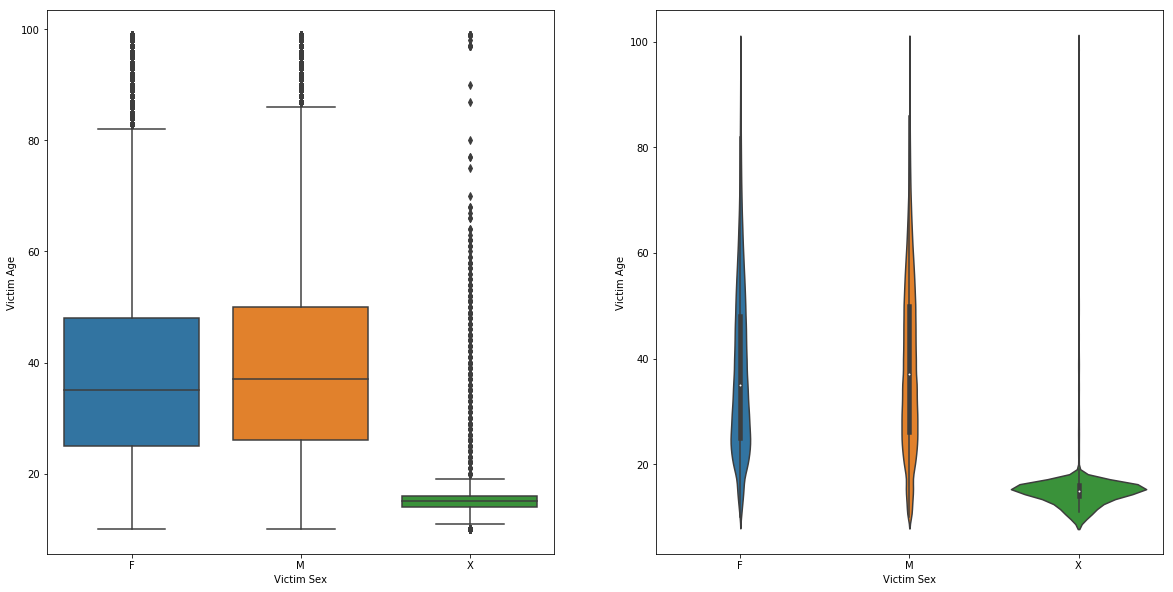

In [98]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.boxplot(x='Victim Sex', y='Victim Age',data=crimes)

plt.subplot(122)
sns.violinplot(x='Victim Sex', y='Victim Age',data=crimes)

## Analyzing the dataset by looking at correlations between attributes

## Clustering